In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from LicensePlateClass import PlateDataset
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
import random
import dicttoxml
import json
import cv2
import geojson
from xml.etree import ElementTree

Using TensorFlow backend.


In [ ]:
def bbox(coord_list):
    box = []
    for i in (0,1):
        res = sorted(coord_list, key=lambda x:x[i])
        box.append((res[0][i],res[-1][i]))
    ret = (box[0][0], box[1][0], box[0][1], box[1][1])
    return ret

In [ ]:
def JSON_to_XML(file):
    json_file = open(file)
    json_str = json_file.read()
    json_data = json.loads(json_str)
    
    json_new = {}
    json_new["annotation"] = [{"folder": "images", "filename": json_data['External ID']}]
    json_new["annotation"].append({"size": {"width": 1920, "height": 1080, "depth": 3}})
    
    for obj in json_data["Label"]['objects']:
        polygon = obj['polygon']
        polygon_list = []
        for p in polygon:
            x, y = p['x'], p['y']
            polygon_list.append((x, y))
        poly = geojson.Polygon(polygon_list)
        line = bbox(list(geojson.utils.coords(poly)))
            
        x = [int(line[0]), int(line[2])]
        y = [int(line[1]), int(line[3])]
        
        print(x, y)


        json_new["annotation"].append({"object": {"name": "plate", "pose": "Unspecified", "truncated":0, "difficult":0,
                                                 "bndbox":{"xmin":min(x), "ymin":min(y), "xmax":max(x), "ymax":max(y)}}})
    
    xml = dicttoxml.dicttoxml(json_new, root=True, attr_type=False)
    with open(r"C:\Users\midni\Desktop\School\GitHub\License-Plate-Detection\Dataset\TestTrainAndTest\annots\00001.xml", "wb") as f:
        f.write(xml)
        f.close

In [ ]:
JSON_to_XML(r'C:\Users\midni\Desktop\School\GitHub\License-Plate-Detection\Dataset\TestTrainAndTest\annots\00001.json')

In [3]:
# train set
train_set = PlateDataset()
train_set.load_dataset(r"C:/Users/midni/Desktop/School/Backup-LicensePlate/Dataset/NLDataSet/Esmeralda/", is_train=True, train_max=801)

In [4]:
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

Train: 91


image_id  1 C:/Users/midni/Desktop/School/Backup-LicensePlate/Dataset/NLDataSet/Esmeralda//images/00563.jpg
image                    shape: (3024, 4032, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (3024, 4032, 1)       min:    0.00000  max:    1.00000  uint8
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  788.00000  max: 2117.00000  int32


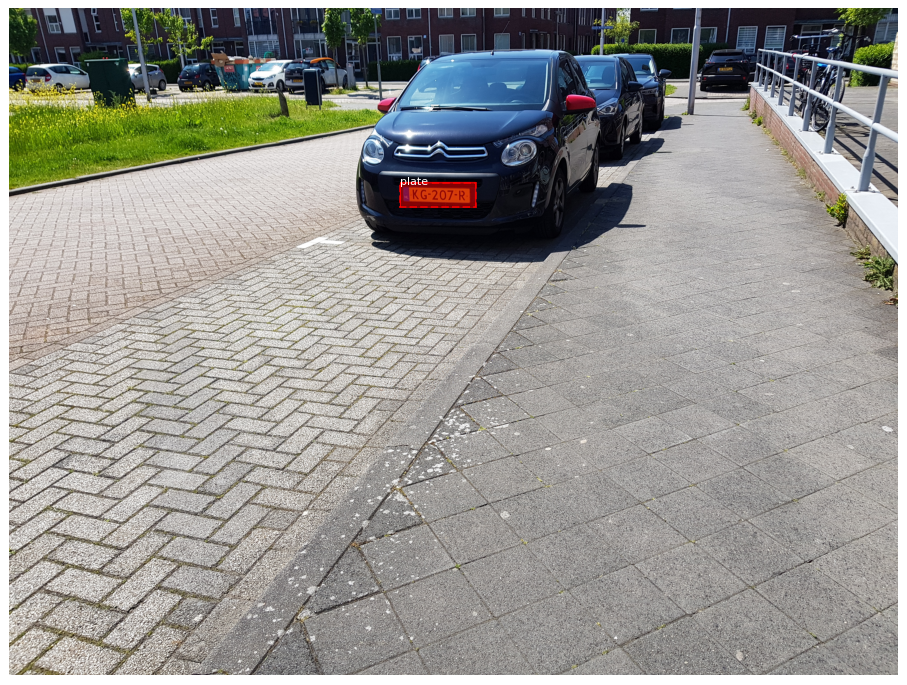

In [8]:
# Load random image and mask.
# print(train_set.image_ids)
image_id = random.choice(train_set.image_ids)
image = train_set.load_image(image_id)
mask, class_ids = train_set.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, train_set.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, train_set.class_names)